# PIVPy example

In [1]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../../')

In [3]:
from pivpy import io, graphics, process

In [4]:
filename = '../data/Run000001.T000.D000.P000.H001.L.vec'

variables, units, rows, cols = io.parse_header(filename)
data = io.loadvec(filename,rows,cols)

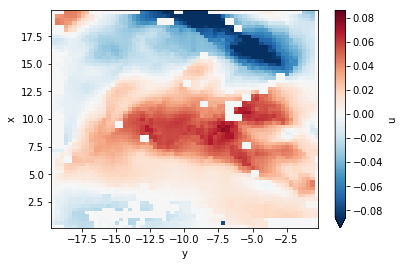

In [5]:
data['u'].plot(robust=True)

In [6]:
data.to_netcdf('test.nc')

In [7]:
d = np.loadtxt(filename,skiprows=1,delimiter=',',usecols=(0,1,2,3,4)).reshape(rows,cols,5)

In [8]:
u = xr.DataArray(d[:,:,2],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
v = xr.DataArray(d[:,:,3],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
cnc = xr.DataArray(d[:,:,4],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
data = xr.Dataset({'u': u, 'v': v,'cnc':cnc})           

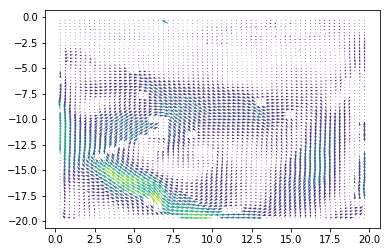

In [9]:
plt.figure()
plt.quiver(data.x,data.y,data.u,data.v,data.u**2 + data.v**2)

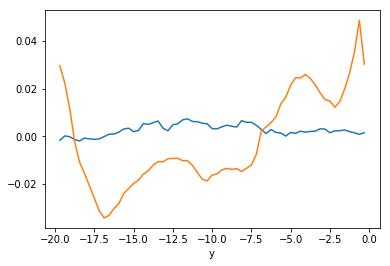

In [10]:
# profile along y
data.mean(dim='x').to_dataframe()['u'].plot()
data.mean(dim='x').to_dataframe()['v'].plot()

In [11]:
data  = io.load_directory('../data')

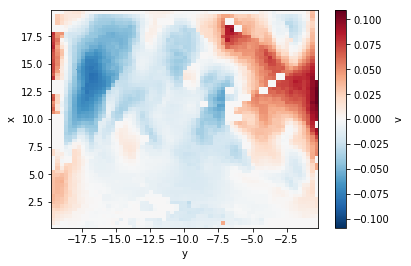

In [12]:
data.isel(t=0)['v'].plot()

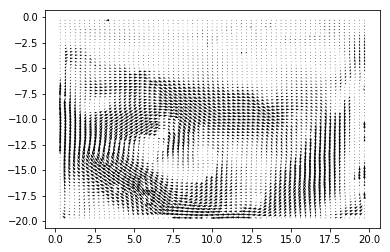

In [13]:
plt.quiver(data['x'],data['y'],data.u.mean(dim='t'),data.v.mean(dim='t'))

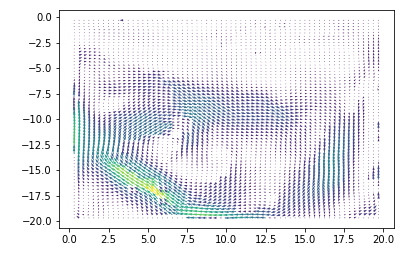

In [19]:
graphics.showf(process.averf(data))

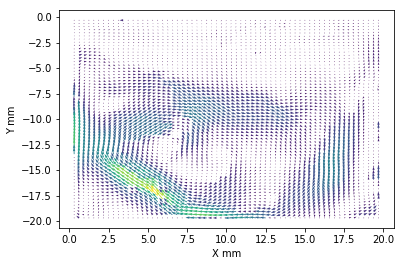

In [16]:
# equivalent to averf 
graphics.showf(data.mean(dim='t'),variables = data.attrs['variables'], units=data.attrs['units'])